In [ ]:
# 
<hr>

In [72]:
# Import

import pandas as pd

import seaborn as sns
sns.set(rc={'figure.figsize':(18,9)})

In [8]:
#
df = pd.read_csv('../clean_data/all_EV_stations-clean.csv',
                low_memory = False)

In [9]:
#
df.head(2)

,Station Name,Street Address,Intersection Directions,City,State,ZIP,Station Phone,Status Code,Expected Date,Groups With Access Code,...,Federal Agency Name,Open Date,EV Connector Types,Country,Access Code,Access Detail Code,Federal Agency Code,Facility Type,EV Pricing,EV On-Site Renewable Source
0,LADWP - Truesdale Center,11797 Truesdale St,NaN,Sun Valley,CA,91352,NaN,E,NaN,Private,...,NaN,1999-10-15,CHADEMO J1772 J1772COMBO,US,private,NaN,NaN,UTILITY,NaN,NaN
1,LADWP - West LA District Office,1394 S Sepulveda Blvd,NaN,Los Angeles,CA,90024,NaN,E,NaN,Private,...,NaN,2020-02-28,J1772,US,private,NaN,NaN,UTILITY,Free,NaN


In [10]:
df['EV Level2 EVSE Num'].unique


<bound method Series.unique of 0         39.0
1          4.0
2         22.0
3         12.0
4        311.0
         ...  
47554      2.0
47555      2.0
47556      6.0
47557      2.0
47558      2.0
Name: EV Level2 EVSE Num, Length: 47559, dtype: float64>

In [ ]:
# Level 2 


In [13]:
# Number of charging locations with level 2 
df[df['EV Level2 EVSE Num'] > 0]['ZIP'].count()

42662

In [12]:
# number of charging units in Total
df[df['EV Level2 EVSE Num'] > 0 ]['EV Level2 EVSE Num'].sum() 

98894.0

Close to a 100K charging units over 42K locations

<br>

In [31]:
#Locations per state
df[df['EV Level2 EVSE Num'] > 0 ]['State'].value_counts(normalize = True).head(7)

CA    0.298580
NY    0.062632
FL    0.052014
TX    0.047302
MA    0.043645
WA    0.036262
GA    0.032746
Name: State, dtype: float64

In [36]:
#Locations per state
df[df['EV Level2 EVSE Num'] > 0 ]['State'].value_counts(normalize = True).head(7).sum()

0.573179879049271

In [48]:
# Top 18 States % minus .29.8% for CA 
df[df['EV Level2 EVSE Num'] > 0 ]['State'].value_counts(normalize = True).head(8).sum() - .298

0.30675364492991425

<span style="color:green"> -----
- CA has 29.8% of the EV Charging in the country.  
- The top 7 States account for 57% of the EV Charging in the US.  
- It takes the next top 8 states to equal CA % of the market  
</span>


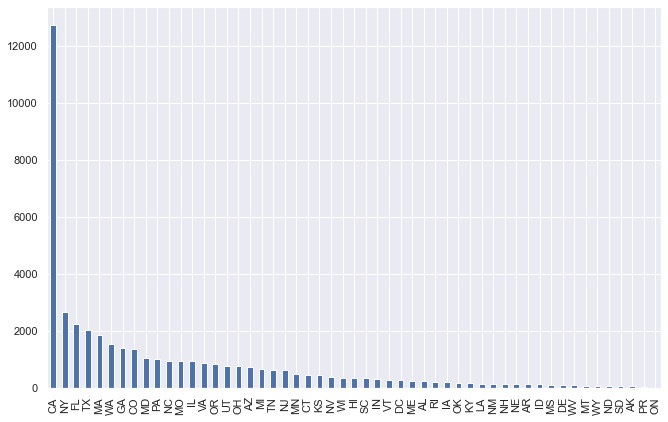

In [89]:
#Locations per state
df[df['EV Level2 EVSE Num'] > 0 ]['State'].value_counts().plot(kind = 'bar', figsize = (11,7));

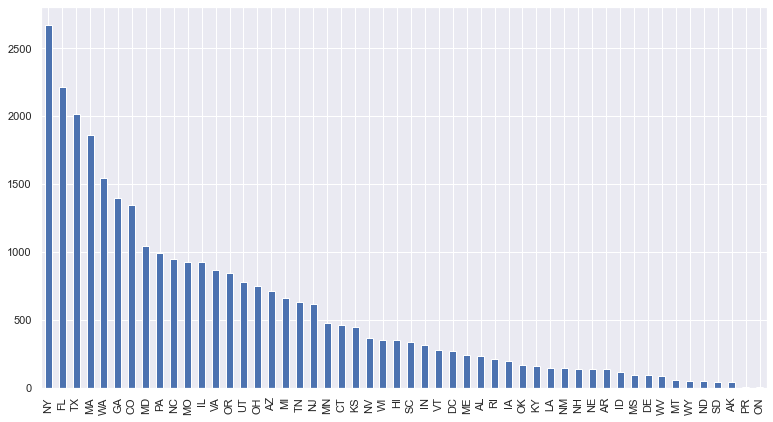

In [83]:
# Locations per state
df[ ((df['EV Level2 EVSE Num'] > 0) & (df['State'] != 'CA' ))]['State'].value_counts().plot(kind = 'bar', figsize = (13,7));

<span style="color:orange">
???
    
There appears to be 3 shelfs in the diagram, NY - CO, MD - NJ, and MN - AK.  
    
 Is there a statistical phenomenon for this? 
 Does this show different slopes.  
 If there are different slopes what does this mean?
</span>

<span style="color:green">
CA, FL, TX, MA, WA, GA, CO, MD all have over 1000 locations
</ span>

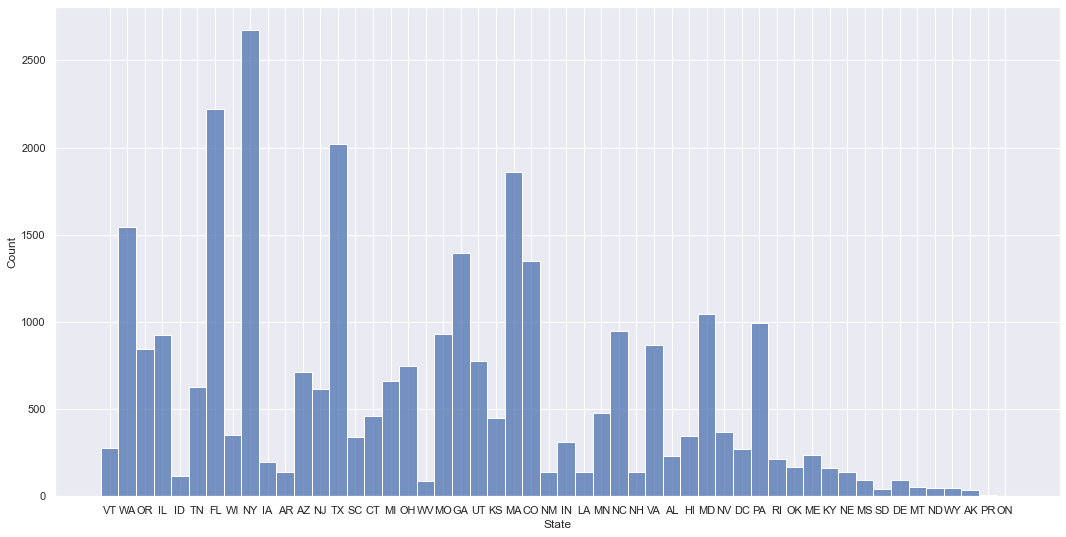

In [84]:
# Locatons per state w/o CA in Seaborn
sns.histplot( data = df[ ((df['EV Level2 EVSE Num'] > 0) & (df['State'] != 'CA' ))],
           x = 'State');